<a href="https://colab.research.google.com/github/jta-aitken/Assignments/blob/main/Classification_Model_Joseph_Aitken.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load Primary Libraries**

In [ ]:
import sklearn
import pandas as pd
import numpy as np

**Understanding the Data**

In [ ]:
# Import the data set.
Data = pd.read_csv('hate_crimes_class.csv')

# Check to see if the data has been imported, as expected, by viewing the top 5 rows.
Data.head()

,state,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi,Trump_Victory
0,Alabama,42278,0.060,0.64,0.821,0.02,0.12,0.472,0.35,0.63,0.125839,1.806410,1
1,Alaska,67629,0.064,0.63,0.914,0.04,0.06,0.422,0.42,0.53,0.143740,1.656700,1
2,Arizona,49254,0.063,0.90,0.842,0.10,0.09,0.455,0.49,0.50,0.225320,3.413928,0
3,Arkansas,44922,0.052,0.69,0.824,0.04,0.12,0.458,0.26,0.60,0.069061,0.869209,1
4,California,60487,0.059,0.97,0.806,0.13,0.09,0.471,0.61,0.33,0.255805,2.397986,0


In [ ]:
# Check the structure is consistent through to the last observation.
Data.tail(1)

,state,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi,Trump_Victory
50,Wyoming,55690,0.04,0.31,0.918,0.02,0.09,0.423,0.15,0.7,NaN,0.266941,1


In [ ]:
# Print the coloumn names for future reference.
Data.keys()

Index(['state', 'median_household_income', 'share_unemployed_seasonal',
       'share_population_in_metro_areas',
       'share_population_with_high_school_degree', 'share_non_citizen',
       'share_white_poverty', 'gini_index', 'share_non_white',
       'share_voters_voted_trump', 'hate_crimes_per_100k_splc',
       'avg_hatecrimes_per_100k_fbi', 'Trump_Victory'],
      dtype='object')

In [ ]:
# Review the type and size of the data set.
print(Data.dtypes)
print(Data.shape)

state                                        object
median_household_income                       int64
share_unemployed_seasonal                   float64
share_population_in_metro_areas             float64
share_population_with_high_school_degree    float64
share_non_citizen                           float64
share_white_poverty                         float64
gini_index                                  float64
share_non_white                             float64
share_voters_voted_trump                    float64
hate_crimes_per_100k_splc                   float64
avg_hatecrimes_per_100k_fbi                 float64
Trump_Victory                                 int64
dtype: object
(51, 13)


In [ ]:
# Check to see if there are any 'Not a Number (NaN)' values in the code that may prevent arithmetic.
print(Data.isnull().sum())

state                                       0
median_household_income                     0
share_unemployed_seasonal                   0
share_population_in_metro_areas             0
share_population_with_high_school_degree    0
share_non_citizen                           3
share_white_poverty                         0
gini_index                                  0
share_non_white                             0
share_voters_voted_trump                    0
hate_crimes_per_100k_splc                   4
avg_hatecrimes_per_100k_fbi                 1
Trump_Victory                               0
dtype: int64


In [ ]:
# The above summary reveals there are 8 instances of NaN values.
# Replace the NaN values with mean values, of their respective column, in above 3 columns using fillna function.

Data.share_non_citizen.fillna(Data.share_non_citizen.mean(), inplace = True)

Data.hate_crimes_per_100k_splc.fillna(Data.hate_crimes_per_100k_splc.mean(), inplace = True)

Data.avg_hatecrimes_per_100k_fbi.fillna(Data.avg_hatecrimes_per_100k_fbi.mean(), inplace = True)

In [ ]:
# Check again for any NaN values.
print(Data.isnull().sum())

state                                       0
median_household_income                     0
share_unemployed_seasonal                   0
share_population_in_metro_areas             0
share_population_with_high_school_degree    0
share_non_citizen                           0
share_white_poverty                         0
gini_index                                  0
share_non_white                             0
share_voters_voted_trump                    0
hate_crimes_per_100k_splc                   0
avg_hatecrimes_per_100k_fbi                 0
Trump_Victory                               0
dtype: int64


In [ ]:
# Remove 'state' column as it will prevent data fitting later i.e. drop the string.
# Remove 'share_voters_voted_trump' as we are predicting a Trump state-victory based off remaining features.
RedactedData = Data.drop(['state','share_voters_voted_trump'], axis = 1)

# Check revised data
print(RedactedData.head())
print(RedactedData.shape)

   median_household_income  ...  Trump_Victory
0                    42278  ...              1
1                    67629  ...              1
2                    49254  ...              0
3                    44922  ...              1
4                    60487  ...              0

[5 rows x 11 columns]
(51, 11)


In [ ]:
# Display key statistics of the data set.
RedactedData.describe()

,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi,Trump_Victory
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,55223.607843,0.049569,0.750196,0.869118,0.054583,0.091765,0.453765,0.315686,0.304093,2.367613,0.470588
std,9208.478170,0.010698,0.181587,0.034073,0.030130,0.024715,0.020891,0.164915,0.242390,1.697016,0.504101
min,35521.000000,0.028000,0.310000,0.799000,0.010000,0.040000,0.419000,0.060000,0.067447,0.266941,0.000000
25%,48657.000000,0.042000,0.630000,0.840500,0.030000,0.075000,0.440000,0.195000,0.147645,1.303706,0.000000
50%,54916.000000,0.051000,0.790000,0.874000,0.050000,0.090000,0.454000,0.280000,0.247009,2.037054,0.000000
75%,60719.000000,0.057500,0.895000,0.898000,0.080000,0.100000,0.466500,0.420000,0.343006,3.168247,1.000000
max,76165.000000,0.073000,1.000000,0.918000,0.130000,0.170000,0.532000,0.810000,1.522302,10.953480,1.000000


**Vizualise the Data**

In [ ]:
# Import the relevant library.
import seaborn as sns
import matplotlib. pyplot as plt
%matplotlib inline

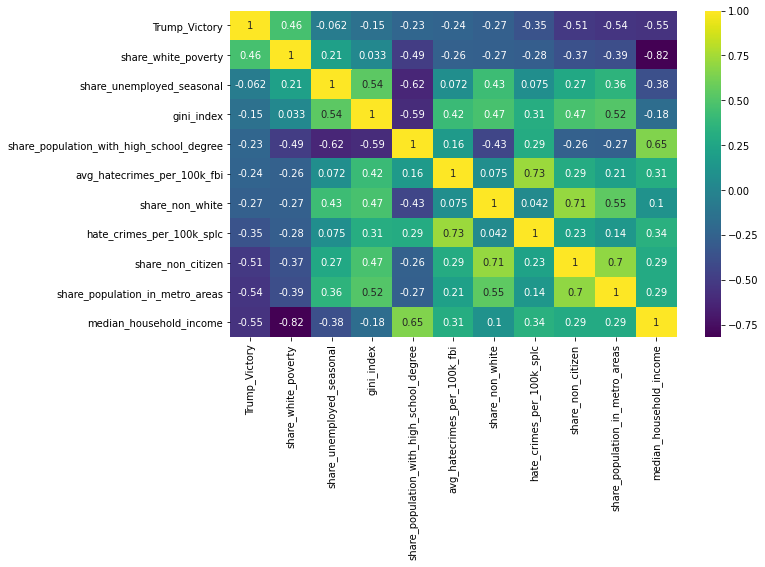

In [ ]:
# View the correlation of our data set by use of seaborn's heatmap function.
cols = RedactedData.corr().nlargest(11, "Trump_Victory")["Trump_Victory"].index
cm = RedactedData[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap= 'viridis')

**Tailoring the Data**

In [ ]:
# Import the relevant sklearn library.
from sklearn.model_selection import train_test_split

In [ ]:
# Divide the data into 'Features' and 'Outcome' using .iloc function.

Features = RedactedData.iloc[:,:-1]

Outcome = RedactedData.iloc[:,-1]

In [ ]:
# Check to see if the data set has been divided, as expected.

print(Features.head())

print(Outcome.head())

   median_household_income  ...  avg_hatecrimes_per_100k_fbi
0                    42278  ...                     1.806410
1                    67629  ...                     1.656700
2                    49254  ...                     3.413928
3                    44922  ...                     0.869209
4                    60487  ...                     2.397986

[5 rows x 10 columns]
0    1
1    1
2    0
3    1
4    0
Name: Trump_Victory, dtype: int64


In [ ]:
# Perfrom train and test split.
X_train, X_test, y_train, y_test = train_test_split(Features,Outcome, test_size = 0.25, shuffle = False, random_state = 0)

# Check the outcome of the split .
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((38, 10), (13, 10), (38,), (13,))

**KNN Model**



> *Best Result*



In [ ]:
# Import relevant sklearn libraries.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Load the model.
KNN_Model = KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Introduce data to the model.
KNN_Model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
# Make predictions.
Prediction = KNN_Model.predict(X_test)
print(len(Prediction))

13


In [ ]:
# Generate model accuracy.
Results = 100*accuracy_score(y_test,Prediction)

In [ ]:
# View model accuracy score.
print("Model used = ",KNN_Model)
print("Accuracy score = ",Results)

Model used =  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
Accuracy score =  92.3076923076923


> *Testing other K values*



In [ ]:
# K = 2
K2 = KNeighborsClassifier(n_neighbors=2)
K2.fit(X_train, y_train)
Pred2 = K2.predict(X_test)
print(len(Pred2))
R2 = 100*accuracy_score(y_test,Pred2)
print("Model used = ",K2)
print("Accuracy score = ",R2)

13
Model used =  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')
Accuracy score =  76.92307692307693


In [ ]:
# K = 4
K4 = KNeighborsClassifier(n_neighbors=4)
K4.fit(X_train, y_train)
Pred4 = K4.predict(X_test)
print(len(Pred4))
R4 = 100*accuracy_score(y_test,Pred4)
print("Model used = ",K4)
print("Accuracy score = ",R4)

13
Model used =  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')
Accuracy score =  69.23076923076923


In [ ]:
# Comparison of K numbers.
print("Model used = ",KNN_Model)
print("Accuracy score = ",Results)
print("Model used = ",K4)
print("Accuracy score = ",R4)
print("Model used = ",K2)
print("Accuracy score = ",R2)

Model used =  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
Accuracy score =  92.3076923076923
Model used =  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')
Accuracy score =  69.23076923076923
Model used =  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')
Accuracy score =  76.92307692307693


**Logistic Regression Model**

In [ ]:
# Import relevant sklearn library.
from sklearn.linear_model import LogisticRegression

In [ ]:
# Load the model.
LR_Model = LogisticRegression()

In [ ]:
# Introduce data to the model.
LR_Model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Make predictions.
Prediction_LR = LR_Model.predict(X_test)
print(len(Prediction_LR))

13


In [ ]:
# View model accuracy score
Results_LR = 100*accuracy_score(y_test,Prediction_LR)
print("Model used = ",LR_Model)
print("Accuracy score = ",Results_LR)

Model used =  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy score =  53.84615384615385


**Feature Selection**

*tested against KNN model*
> SelectKBest

In [ ]:
# Import relevant sklearn library
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
# Deploy SelectKBest function
SKBest = SelectKBest(score_func=chi2, k=5)
SKBest.fit(X_train, y_train)

SelectKBest(k=5, score_func=<function chi2 at 0x7feafcc06e18>)

In [ ]:
# View the best 5 columns
SKBest_Features = pd.DataFrame({'Feature':list(X_train.columns),
                                'Rank':SKBest.scores_})
SKBest_Features.sort_values(by='Rank', ascending=False)

,Feature,Rank
0,median_household_income,15441.851410
9,avg_hatecrimes_per_100k_fbi,4.694839
8,hate_crimes_per_100k_splc,1.362118
2,share_population_in_metro_areas,0.572347
7,share_non_white,0.451424
4,share_non_citizen,0.267917
5,share_white_poverty,0.064554
1,share_unemployed_seasonal,0.002410
6,gini_index,0.002274
3,share_population_with_high_school_degree,0.000893


In [ ]:
# Transform the data
X_train_SK = SKBest.transform(X_train)
X_test_SK = SKBest.transform(X_test)

In [ ]:
# Fit the transformed data to the model
SK_Model = KNN_Model.fit(X_train_SK,y_train)

In [ ]:
Prediction = KNN_Model.predict(X_test_SK)

In [ ]:
Results = 100*accuracy_score(y_test,Prediction)

In [ ]:
print("Model used = ",SK_Model)
print("Accuracy score = ",Results)

Model used =  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
Accuracy score =  92.3076923076923
